# World Happiness
### <span style="color:#83898b"> *Examining the impact of several factors on happiness* </span>
##### *Daniel Zajac - 100820183*

It has been said that happiness comes from within, implying that regardless of someone's situation and surroundings, they can live a happy life. After finding a dataset with 'happiness scores' from different countires around the world, I wanted to evaulate the effects that a person's environment has on their happiness and their quality of life. Many countries around the world are vastly different; some have free health care and a world-class education system, while others don't have easy access to fresh water. Some countries have advanced medical technology, while others are unable to cure common diseases. Another commonly used phrase is that money cannot buy happiness, and yet most people in the world would say that they would be happier with more money. With all being said, it seems likely that variables such as healthy life expectancy, gross domestic product per capita (GDP) and political corruption would have an impact on people's well being, so using data collected globally from 2006-2019, I will explore the relationship between these variables and happiness score in several countries.

## Methods
### Data Collection

The dataset analyzed in this assignment was published on [Kaggle](https://www.kaggle.com/datasets/londeen/world-happiness-report-2020), and the statistical appendix for this data is available [here](https://happiness-report.s3.amazonaws.com/2020/WHR20_Ch2_Statistical_Appendix.pdf).

#### Description of relevant variables

Note: The majority of these being used in the assignment were collected in 2019, see statistical appendix above for more details.

- Happiness Score : Average of country's citizens' reponses to the question: “Please imagine a ladder, with steps numbered from 0 at the bottom to 10 at the top. The top of the ladder represents the best possible life for you and the bottom of the ladder represents the worst possible life for you. On which step of the ladder would you say you personally feel you stand at this time?”
- GDP: The statistics of GDP per capita in purchasing power parity (PPP) at constant 2011 international dollar prices are from the November 28, 2019 update of the World Development Indicators (WDI).
- Region: Region of each country
- Life Expectancy: Healthy life expectancy at birth (extracted from the World Health Organization’s (WHO) Global Health Observatory data repository.)
- Corruption: The national average of the survey responses to two questions: “Is corruption widespread throughout the government or not” and “Is corruption widespread within businesses or not?” Corruption is just the average of the two 0-or-1 responses.

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [94]:
#Load dataset (from google drive download link, since link from website requires login; if download does not work, manual
#file download available from link under data collection)
world_happiness = pd.read_csv('https://drive.google.com/u/0/uc?id=1rzxQVVh9iGdZcCmbohm-TSyBqz16c6iZ&export=download')


### Data Cleaning

I dropped columns that would not be used, and renamed relevant variables to be more concise. Similarily, I kept printing outputs to 2-decimal accuracy.

In [95]:
#Dropping unused categories
world_happiness = world_happiness.drop(['Standard error of ladder score', 'upperwhisker', 'lowerwhisker', 'Social support', 
'Freedom to make life choices', 'Generosity', 'Ladder score in Dystopia','Explained by: Log GDP per capita', 'Explained by: Social support',
'Explained by: Healthy life expectancy', 'Explained by: Freedom to make life choices', 'Explained by: Generosity',
'Explained by: Perceptions of corruption', 'Dystopia + residual'], axis = 1)

#renaming columns
world_happiness.columns = ["Country", "Region", "Happiness", "GDP", "Life_Expectancy", "Perceptions_of_corruption"]

#rounding outputs
pd.set_option('display.precision', 2)

## Analyses

I will perform exploratory data analysis on the dataset to uncover the relationships between healthy life expectancy, GDP,
corruption and region on happiness, using statistical analysis and data visualization along the way.

### Happiness Score Distribution

First I will take a look at the distribution of happiness scores. The histogram below shows that most countries have a happiness score below 6.

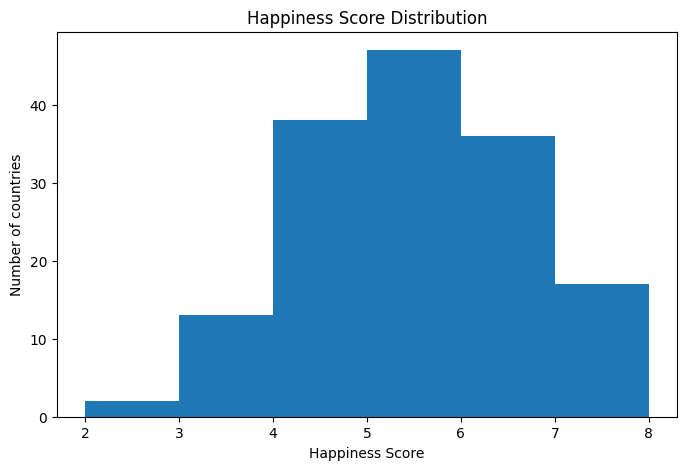

In [96]:
#histogram of happiness scores
world_happiness.Happiness.hist(bins=range(2,9), figsize=(8,5), grid=False)
plt.xlabel("Happiness Score")
plt.ylabel("Number of countries")
plt.title("Happiness Score Distribution")

plt.show()

The difference between the minimum and maximum happiness score shows a diverse spread of scores between countries.

In [97]:
#Relevant happiness score stats
happiness_stats = world_happiness["Happiness"].describe()
print(f"Min happiness score: {round(happiness_stats['min'],2)}")
print(f"Mean happiness score: {round(happiness_stats['mean'],2)}")
print(f"Max happiness score: {round(happiness_stats['max'],2)}")

Min happiness score: 2.57
Mean happiness score: 5.47
Max happiness score: 7.81


### Regions on Happiness

A look at the average happiness score in each region in Figure 1 shows that region is related to a country's happiness score, but since regions are non-ordinal data, no patterns arise.

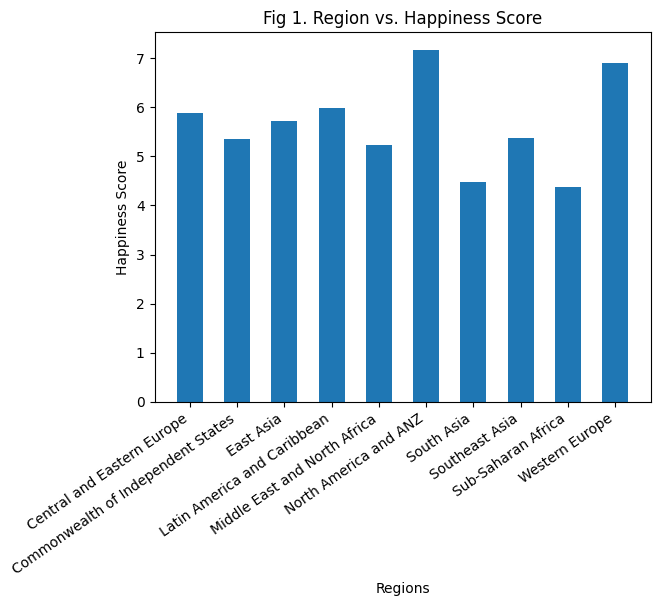

In [98]:
#finding the average happiness level of countries in each regions
grouped_regions = world_happiness["Happiness"].groupby([world_happiness["Region"]]).mean()

#creating a list of labels for the x-axis, ordered alphabetically   
regions = sorted(world_happiness["Region"].unique().tolist())
x = np.arange(len(regions))

#graphing regions vs. happiness score
plt.bar(x, grouped_regions, width=0.55)
plt.xticks(rotation=35, ha='right')
plt.xticks(x, regions)
plt.title("Fig 1. Region vs. Happiness Score")
plt.ylabel("Happiness Score")
plt.xlabel("Regions")

plt.show()

The output below shows how many countries are in each region.

In [99]:
#finding the amount of countries in each region
countries_per_region = world_happiness.groupby(["Region"]).size()
countries_per_region

Region
Central and Eastern Europe            17
Commonwealth of Independent States    12
East Asia                              6
Latin America and Caribbean           21
Middle East and North Africa          17
North America and ANZ                  4
South Asia                             7
Southeast Asia                         9
Sub-Saharan Africa                    39
Western Europe                        21
dtype: int64

The relationship between countries per region and average happiness score is visualized in figure 2, which reveals no clear pattern.

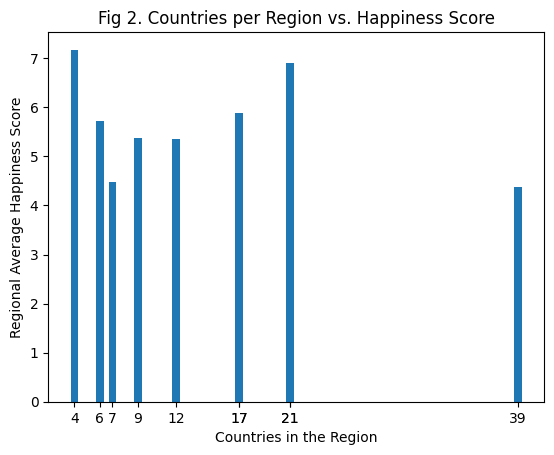

In [100]:
#graphing regions vs. happiness level
plt.bar(countries_per_region, grouped_regions, width=0.6)
plt.xticks(countries_per_region, countries_per_region)
plt.ylabel("Regional Average Happiness Score")
plt.xlabel("Countries in the Region")
plt.title("Fig 2. Countries per Region vs. Happiness Score")

plt.show()

### Life Expectancy on Happiness

The scatter plot of life expectancy vs. happiness score in figure 3 reveals that they are related.

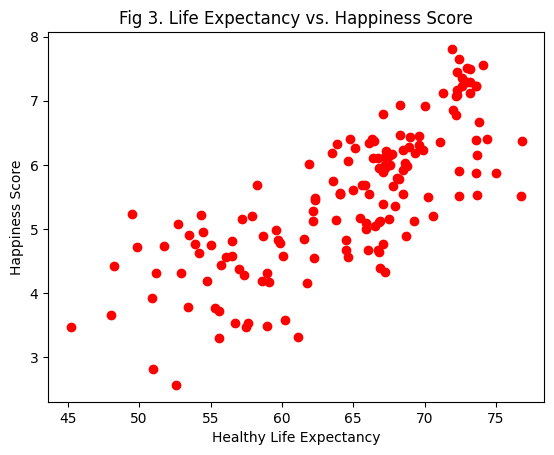

In [101]:
#scatter plot of life expectancy vs happiness
plt.scatter(world_happiness["Life_Expectancy"], world_happiness["Happiness"], color = "red")
plt.ylabel("Happiness Score")
plt.xlabel("Healthy Life Expectancy")
plt.title("Fig 3. Life Expectancy vs. Happiness Score")

plt.show()

Pearson's correlation coefficient between life expectancy and happiness score is roughly 0.77, which denotes a strong positive relationship between the two. 

Note: We ignore the values in the top-left and top-right in the output, as these values are obtained from comparing each series to itself.

In [102]:
#finding pearson's correlation coefficient between life expectancy and happiness score
np.corrcoef(world_happiness["Life_Expectancy"], world_happiness["Happiness"])

array([[1.        , 0.77031629],
       [0.77031629, 1.        ]])

### GDP on Happiness

A new column is created, categorizing GDP into different intervals for examination.

In [103]:
#categorizing GDP into an extra column so we can easily use groupby operations
world_happiness.loc[world_happiness["GDP"] < 12, "GDP_Range"] = "11-12"
world_happiness.loc[world_happiness["GDP"] < 11, "GDP_Range"] = "10-11"
world_happiness.loc[world_happiness["GDP"] < 10, "GDP_Range"] = "9-10"
world_happiness.loc[world_happiness["GDP"] < 9, "GDP_Range"] = "8-9"
world_happiness.loc[world_happiness["GDP"] < 8, "GDP_Range"] = "7-8"
world_happiness.loc[world_happiness["GDP"] < 7, "GDP_Range"] = "6-7"

#finding the average happiness level of countries with similar GDPs (groupby operation)
grouped_GDP_ranges = world_happiness["Happiness"].groupby([world_happiness["GDP_Range"]]).mean()

#reorganizing the list into ascending order of GDP range
ranges = ["6-7", "7-8", "8-9", "9-10", "10-11", "11-12"]
grouped_GDP_ranges = grouped_GDP_ranges.reindex(ranges)

The relationship between GDP and happiness score is visualized in figure 4, which reveals a positive relationship between the two.

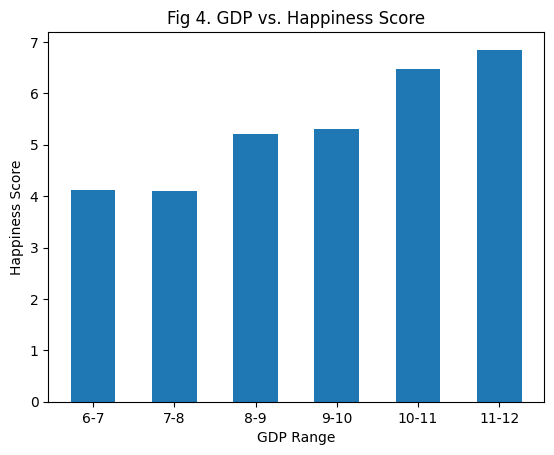

In [104]:
#graphing regions vs. happiness level
x2 = np.arange(len(ranges))
plt.bar(x2, grouped_GDP_ranges, width=0.55)
plt.xticks(x2, ranges)
plt.ylabel("Happiness Score")
plt.xlabel("GDP Range")
plt.title("Fig 4. GDP vs. Happiness Score")

plt.show()

### Corruption on Happiness

A new column is created, categorizing happiness scores into intervals (of length 1) for examination. Another column is created as well, splitting corruption into three categories.

In [105]:
#categorizing happiness scores into a new column to use groupby operations
world_happiness.loc[world_happiness["Happiness"] < 8, "Happiness_Range"] = "7-8"
world_happiness.loc[world_happiness["Happiness"] < 7, "Happiness_Range"] = "6-7"
world_happiness.loc[world_happiness["Happiness"] < 6, "Happiness_Range"] = "5-6"
world_happiness.loc[world_happiness["Happiness"] < 5, "Happiness_Range"] = "4-5"
world_happiness.loc[world_happiness["Happiness"] < 4, "Happiness_Range"] = "3-4"
world_happiness.loc[world_happiness["Happiness"] < 3, "Happiness_Range"] = "2-3"

#categorizing corruption scores into a new column to use groupby operations
world_happiness.loc[world_happiness["Perceptions_of_corruption"] < 1, "Corruption_Range"] = "Extremely Corrupt"
world_happiness.loc[world_happiness["Perceptions_of_corruption"] < 0.8, "Corruption_Range"] = "Mildly Corrupt"
world_happiness.loc[world_happiness["Perceptions_of_corruption"] < 0.5, "Corruption_Range"] = "Slightly Corrupt"

#groupby operations
corruption_happiness = world_happiness.groupby(['Happiness_Range','Corruption_Range']).size().unstack()
corruption_happiness

Corruption_Range,Extremely Corrupt,Mildly Corrupt,Slightly Corrupt
Happiness_Range,,,
2-3,1.0,1.0,NaN
3-4,6.0,6.0,1.0
4-5,20.0,18.0,NaN
5-6,27.0,19.0,1.0
6-7,15.0,20.0,1.0
7-8,NaN,3.0,14.0


Values of corruption between 0 and 0.5 were placed in the category 'Slightly Corrupt', remaining values less than 0.8 were placed in the category 'Mildly Corrupt', and anything else was placed in the category 'Extremely Corrupt'.

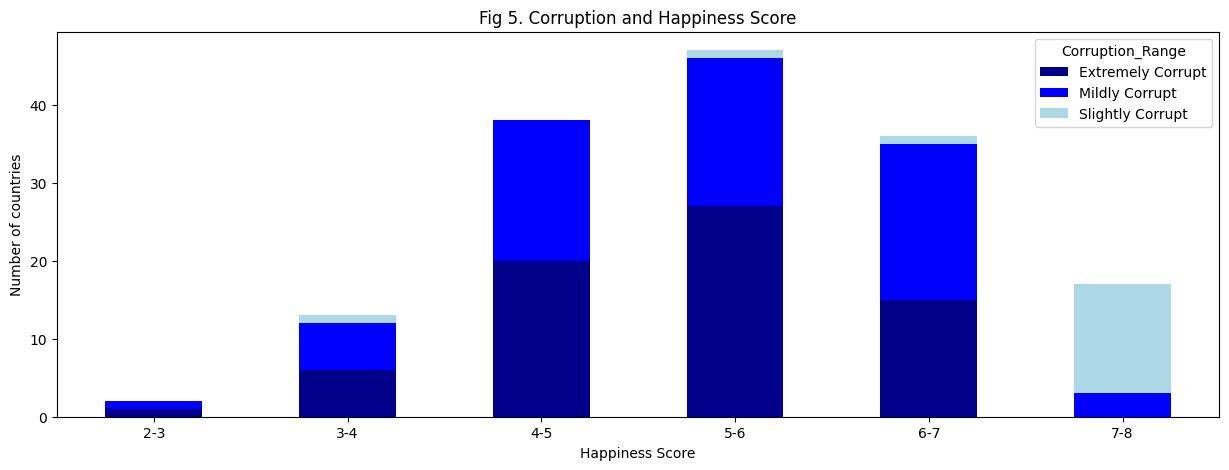

In [106]:
#graphing the number of countries in each category of both corruption and happiness score
corruption_happiness_plot = corruption_happiness.plot.bar(stacked = True, color = ["darkblue", "blue", "lightblue"], 
figsize=(15,5), title="Fig 5. Corruption and Happiness Score")
plt.ylabel("Number of countries")
plt.xlabel('Happiness Score')
plt.xticks(rotation=0)

plt.show(corruption_happiness_plot)

Figure 5 shows the relationship between happiness score and corruption.

## Discussion

In this assignment I found data related to happiness in a selection of countries, and analyzed the relationships between happiness score and several other variables like GDP and region. Using an exploratory analysis, I found significant trends in the relationships of corruption, life expectancy and GDP on happiness score. I found a strong positive correlation between life expectancy and happiness score, meaning as countries' life expectancies increased, their happiness scores increased as well. This may be because people in countries with lower life expectancies have less time to spend with loved ones, and deal with more stress as a result. Likewise, countries with a higher GDP are also more likely to have a higher happiness score. This makes sense, since people from less wealthy countries may lack certain necessities or may be unable to purchase items that would improve their life. The relationship between corruption and happiness score is not as clear, however I did find that the countries with the highest happiness scores also had significantly lower corruption scores on average. A possible explantion is that people in less corrupt countries feel more secure since they can trust their governments, which leads to increased happiness. The number of countries in each region does not appear to affect the region's average happiness score. I also found that while happiness scores between regions were different, there was no clear pattern as to why, as it is hard to find patterns in non-ordinal data. Many other environmental factors such as water scarcity, pollution or war may be the cause for this. The relationships found in this assignment show that many factors can have an affect on people's happiness, which suggests that there are defined ways to increase a country's happiness score. While this may not be an easy task, it at least provides hope, and a possibility to increase happiness.

## References

1. Source Data: https://www.kaggle.com/datasets/londeen/world-happiness-report-2020?select=WHR20_DataForFigure2.1.csv
2. Pandas for data manipulation
3. Matplotlib for data visualization
4. Numpy for array functionality

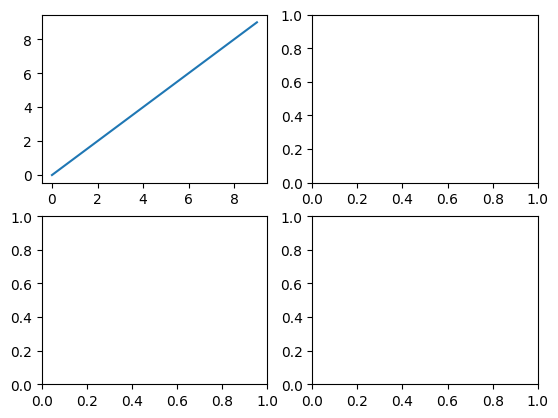

In [123]:
import seaborn as sns

fig, axes = plt.subplots(2,2)
axes[0,0].plot(np.arange(10))